In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [3]:
gas=pd.read_csv('gas_turbines.csv')
gas.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [4]:
# Checking for null values
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
# Checking for duplicate values
gas.duplicated().sum()

0

In [6]:
df=gas[['AT','AP','AH','TEY']]
df.head()

AT      AP      AH     TEY
0  6.8594  1007.9  96.799  114.70
1  6.7850  1008.4  97.118  114.72
2  6.8977  1008.8  95.939  114.71
3  7.0569  1009.2  95.249  114.72
4  7.3978  1009.7  95.150  114.72

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [8]:
df.describe()

AT           AP            AH           TEY
count  15039.000000  15039.00000  15039.000000  15039.000000
mean      17.764381   1013.19924     79.124174    134.188464
std        7.574323      6.41076     13.793439     15.829717
min        0.522300    985.85000     30.344000    100.170000
25%       11.408000   1008.90000     69.750000    127.985000
50%       18.186000   1012.80000     82.266000    133.780000
75%       23.862500   1016.90000     90.043500    140.895000
max       34.929000   1034.20000    100.200000    174.610000

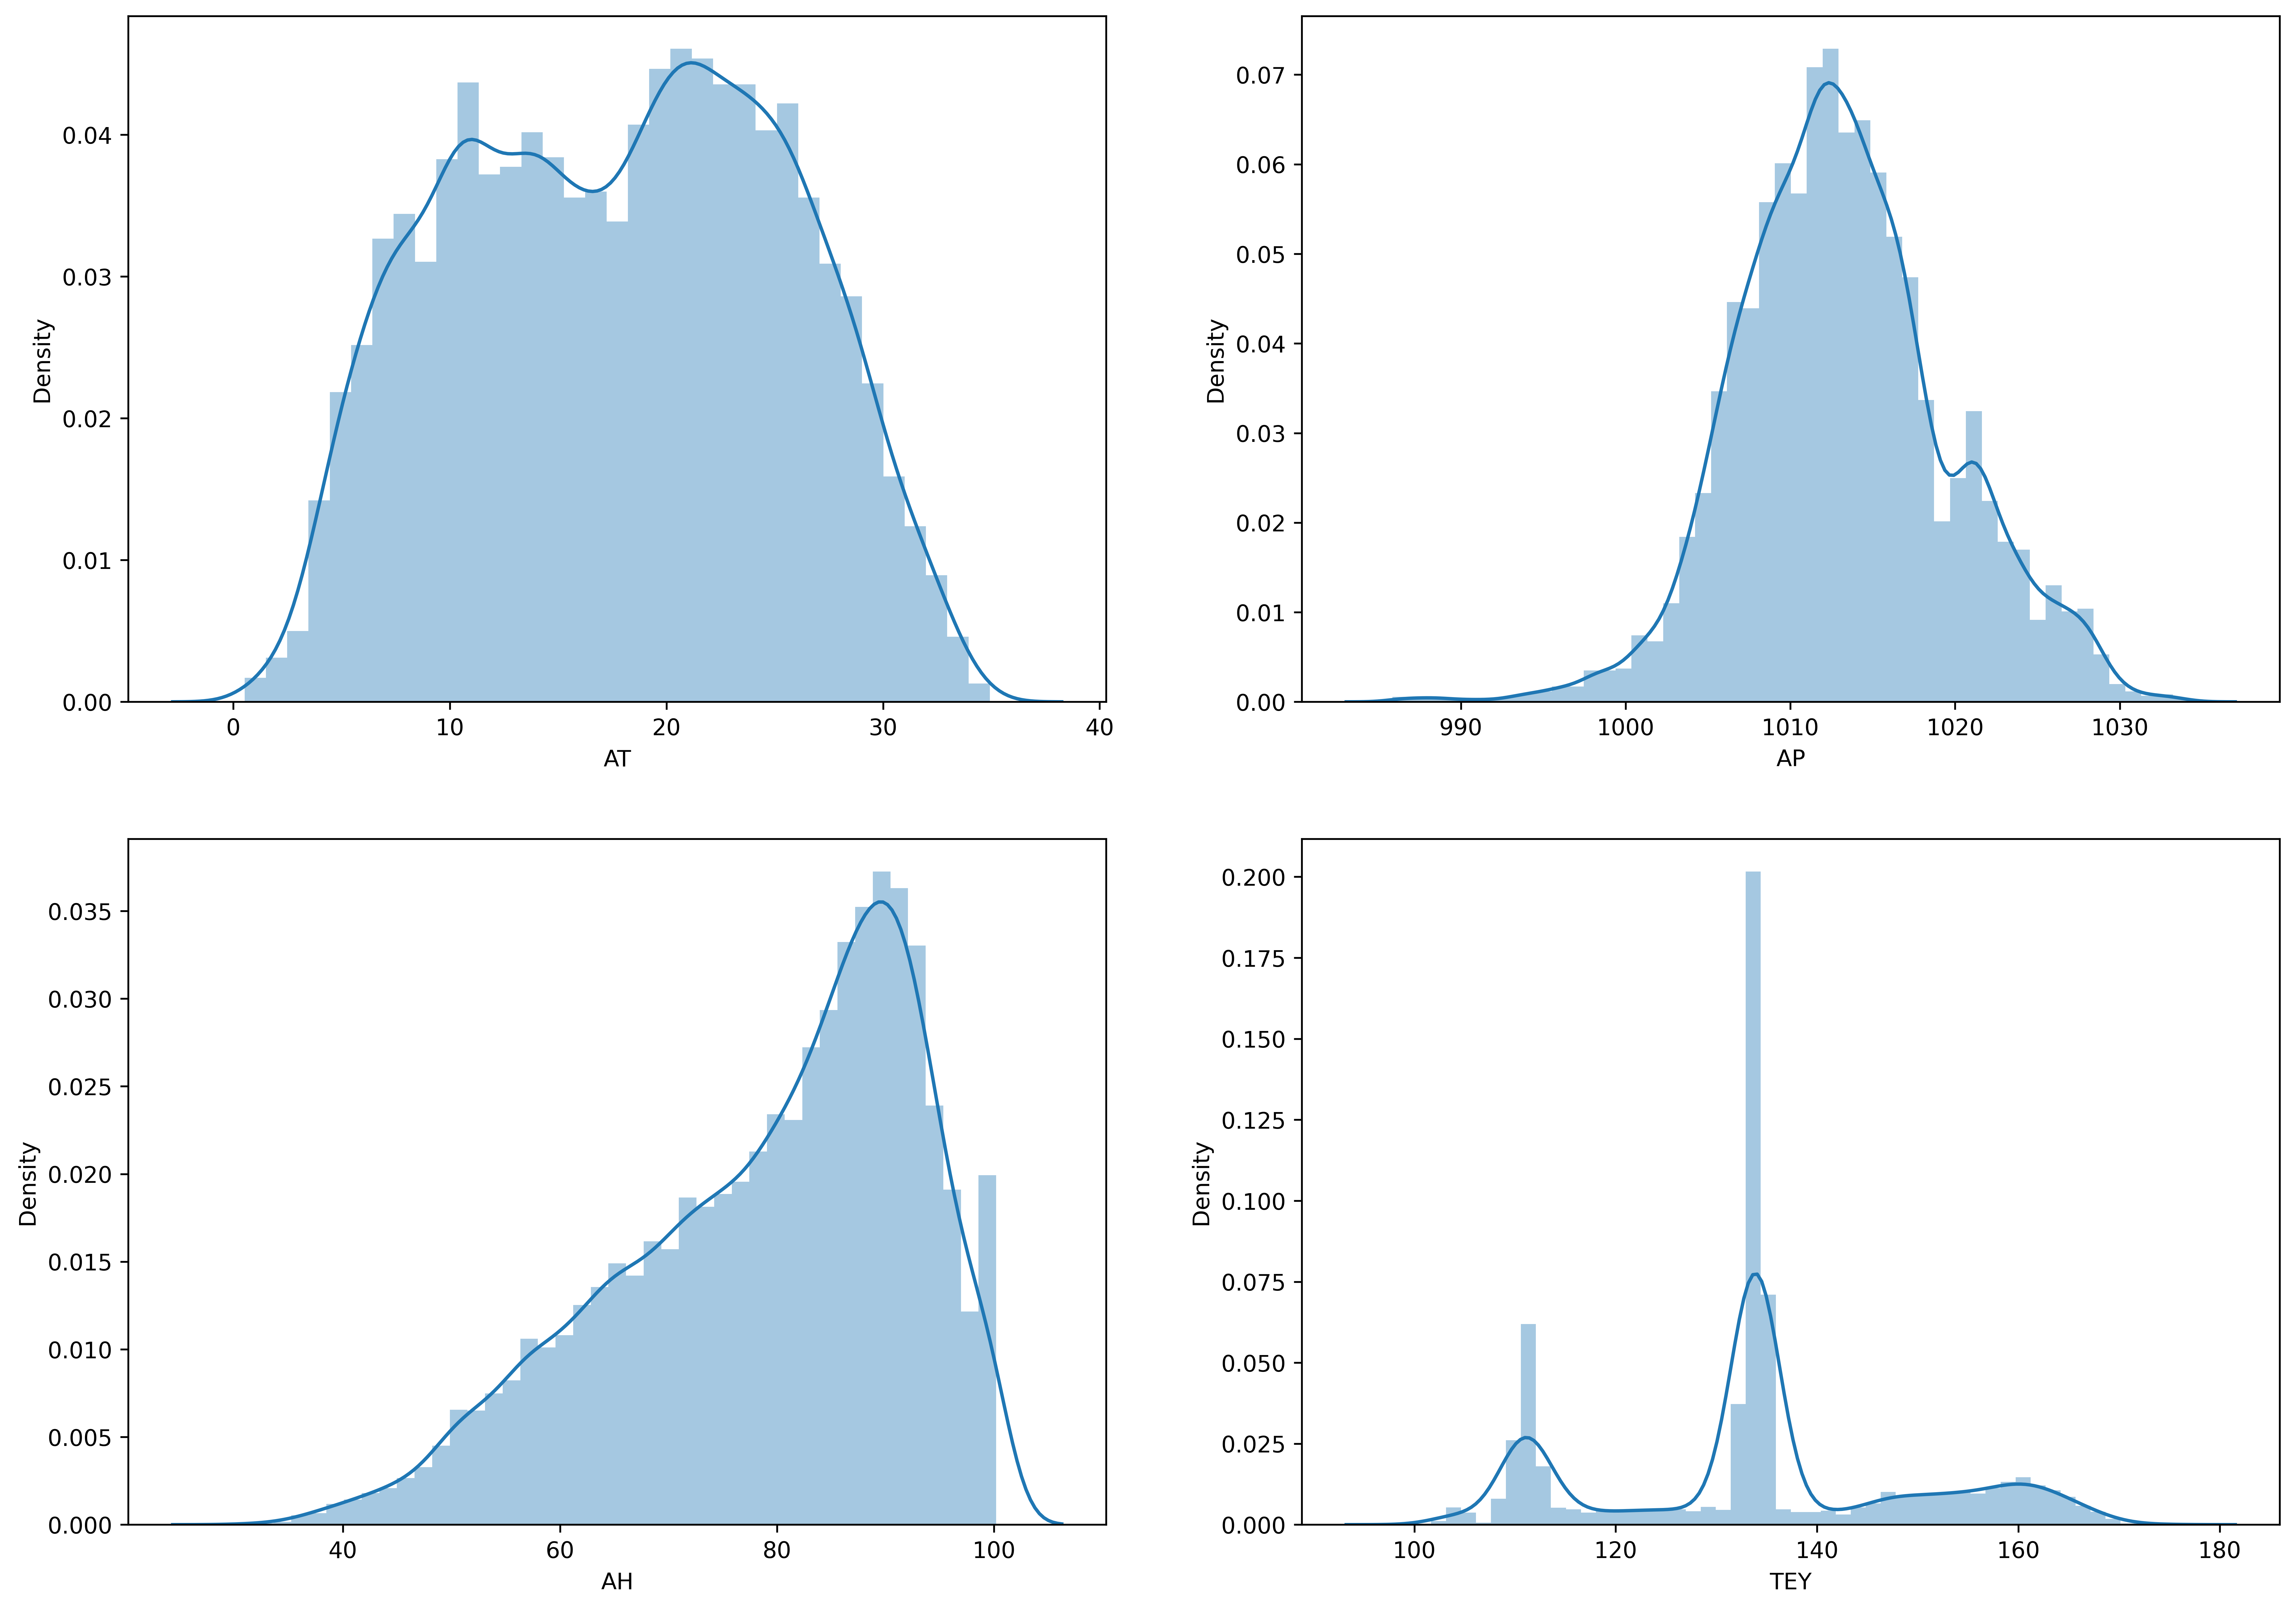

In [9]:
# distplot

fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)

sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.TEY, ax = ax[1,1])
plt.show()

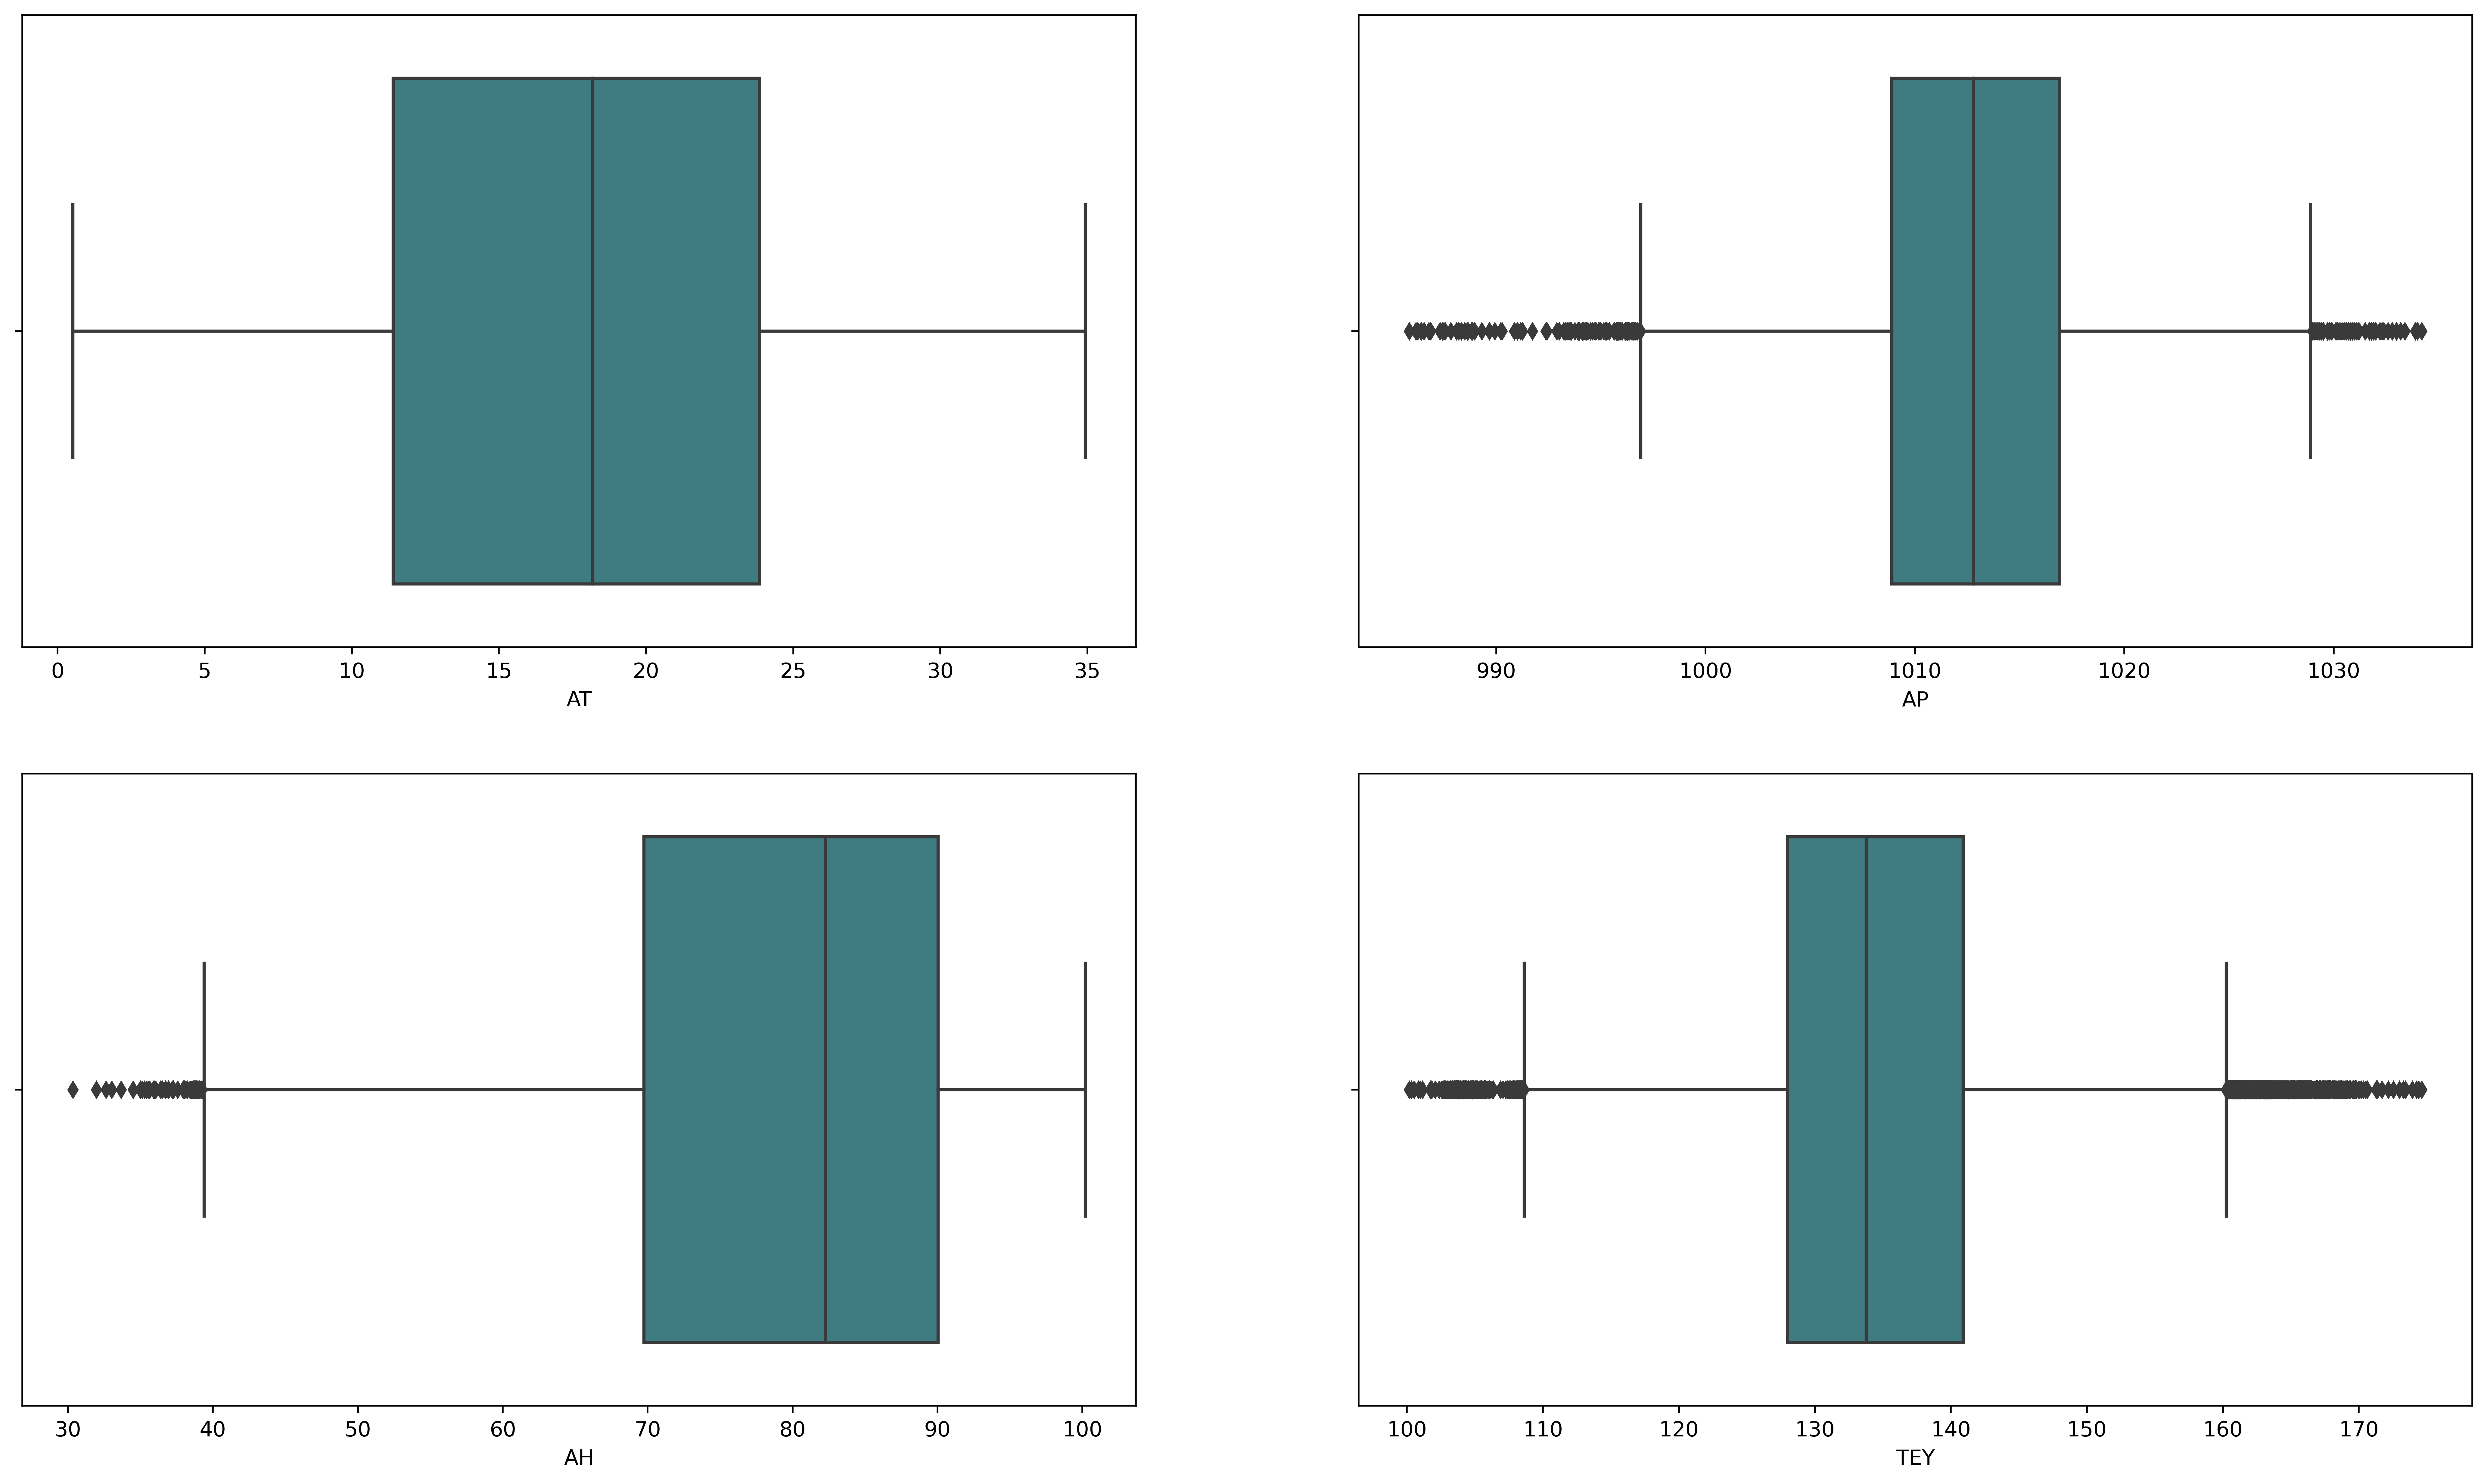

In [10]:
# Outlier detection
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12),dpi=500)
sns.boxplot(x='AT',data=df,palette='crest',ax=axes[0,0])
sns.boxplot(x='AP',data=df,palette='crest',ax=axes[0,1])
sns.boxplot(x='AH',data=df,palette='crest',ax=axes[1,0])
sns.boxplot(x='TEY',data=df,palette='crest',ax=axes[1,1])
plt.show()

Text(0.5, 1.0, 'Histogram of the Target Column')

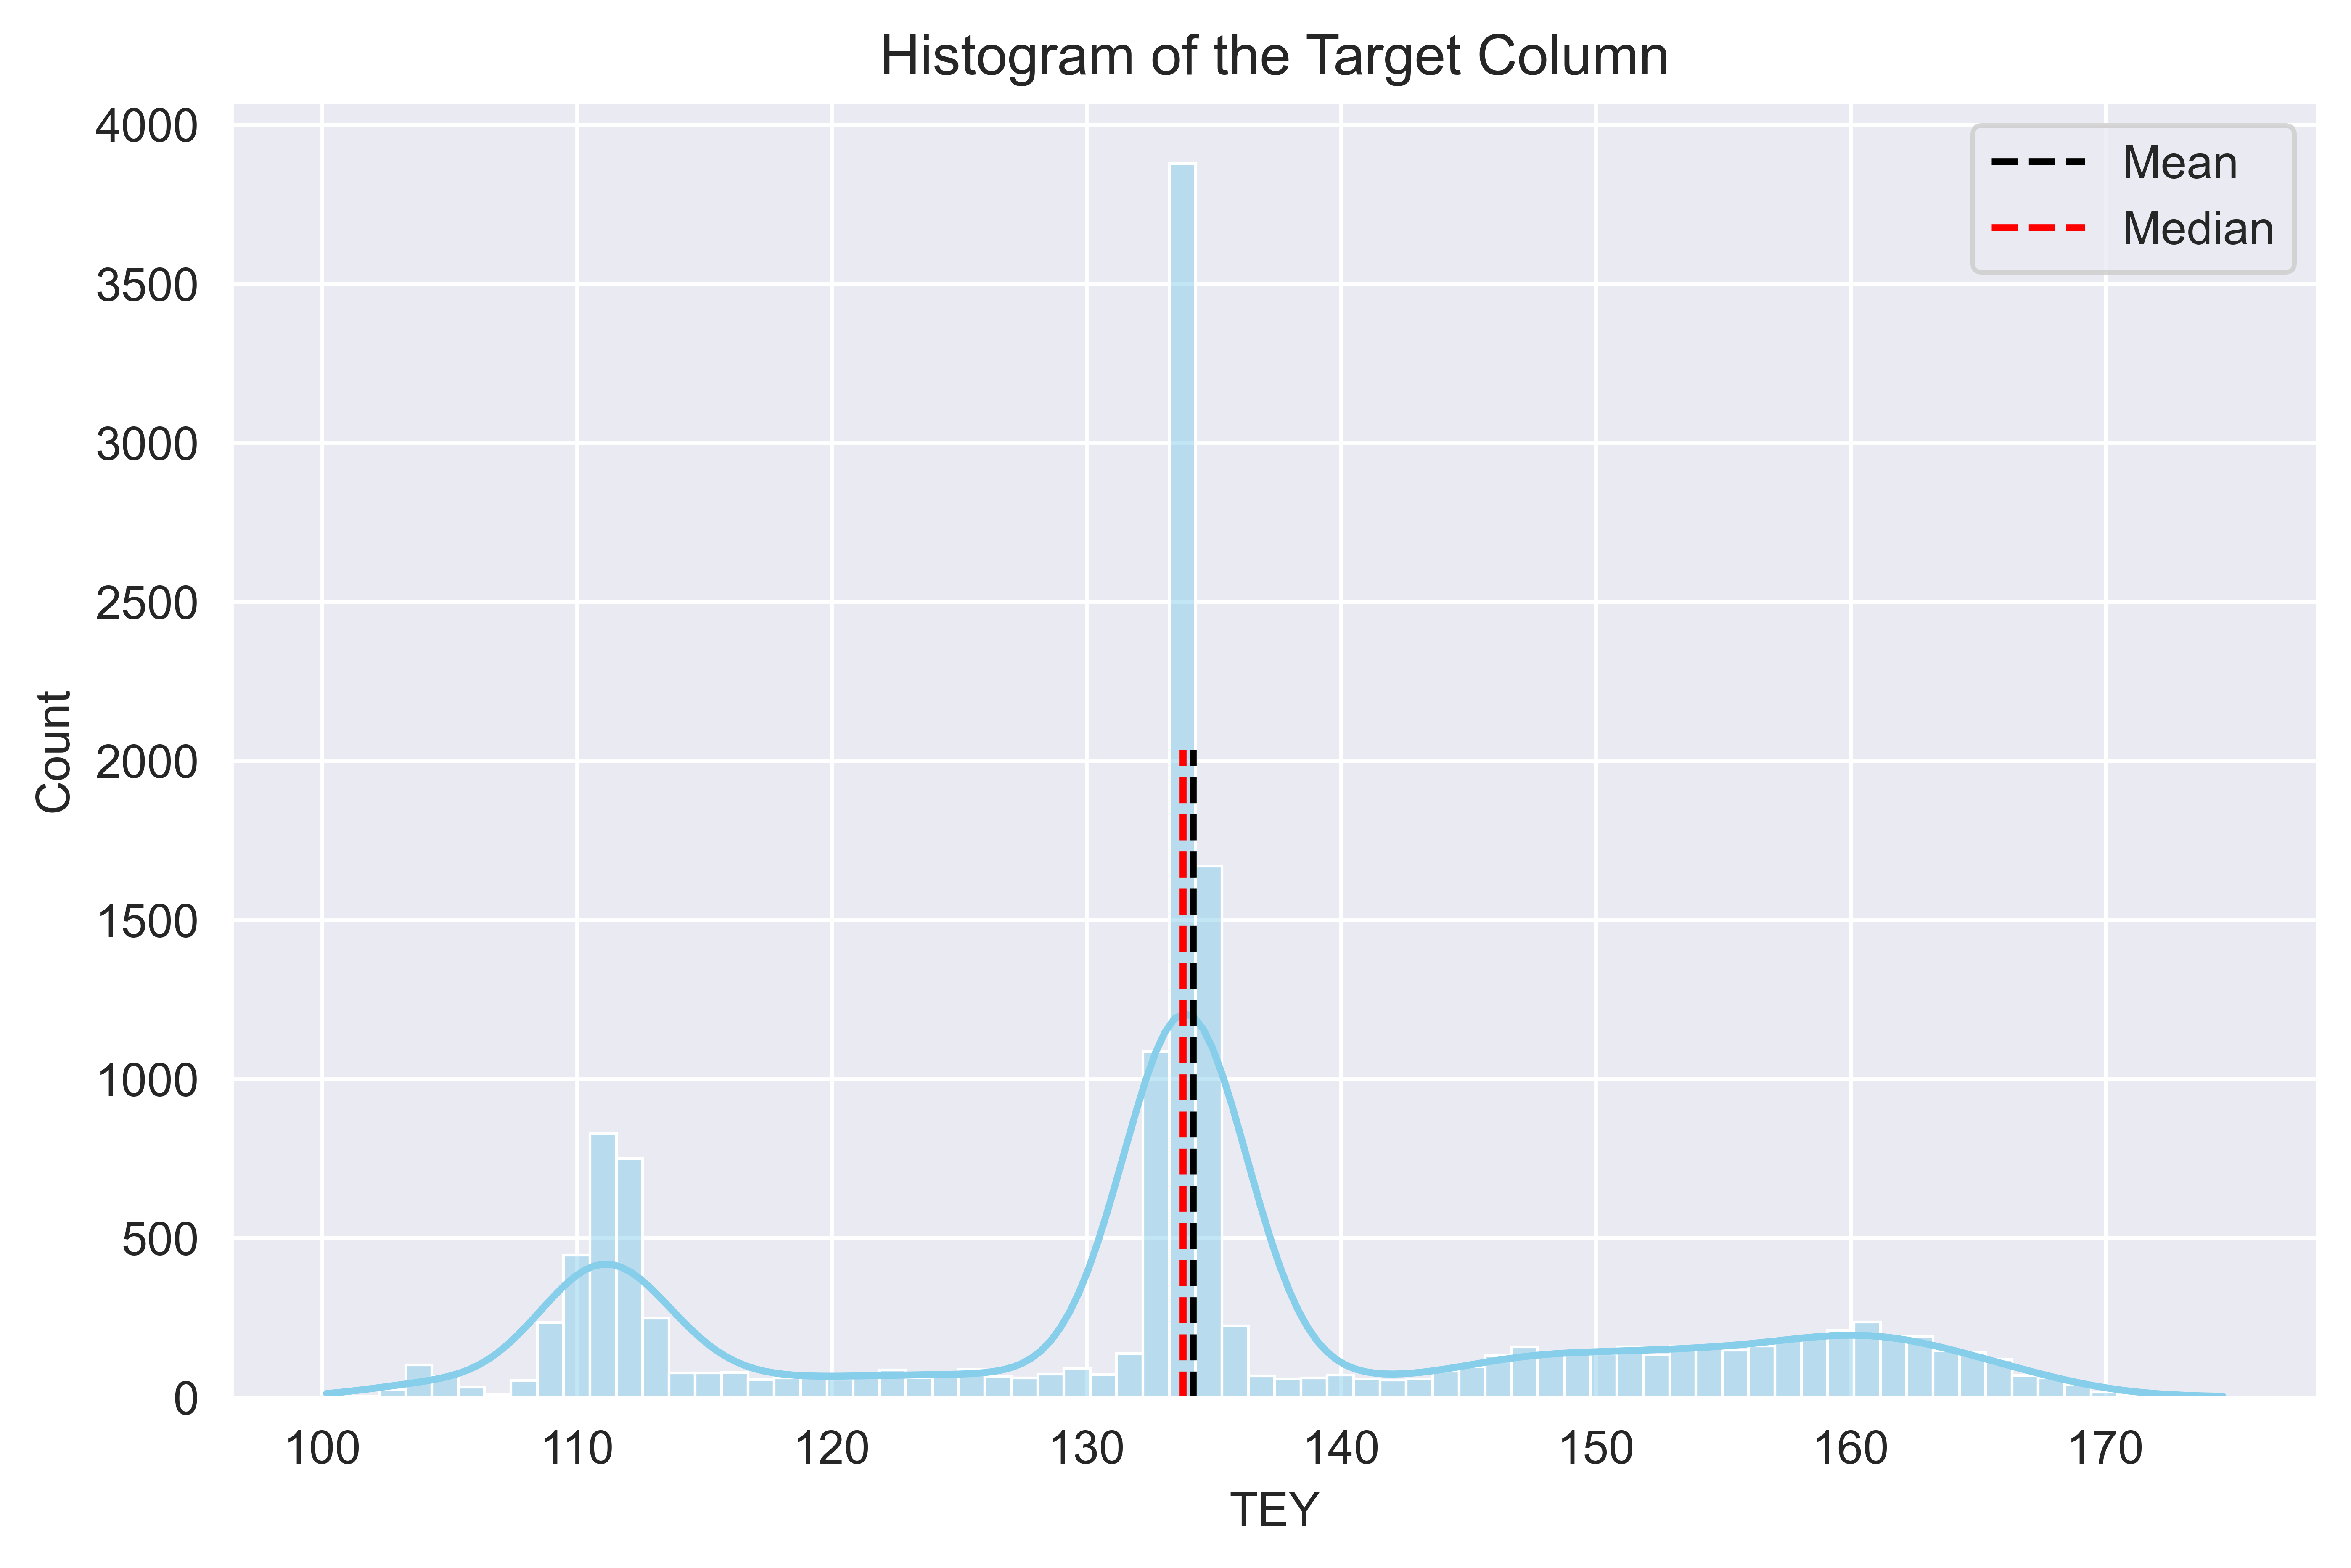

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5),dpi=800)
sns.histplot(data=df,x="TEY",color="skyblue",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.5,color="black",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.5,color="red",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

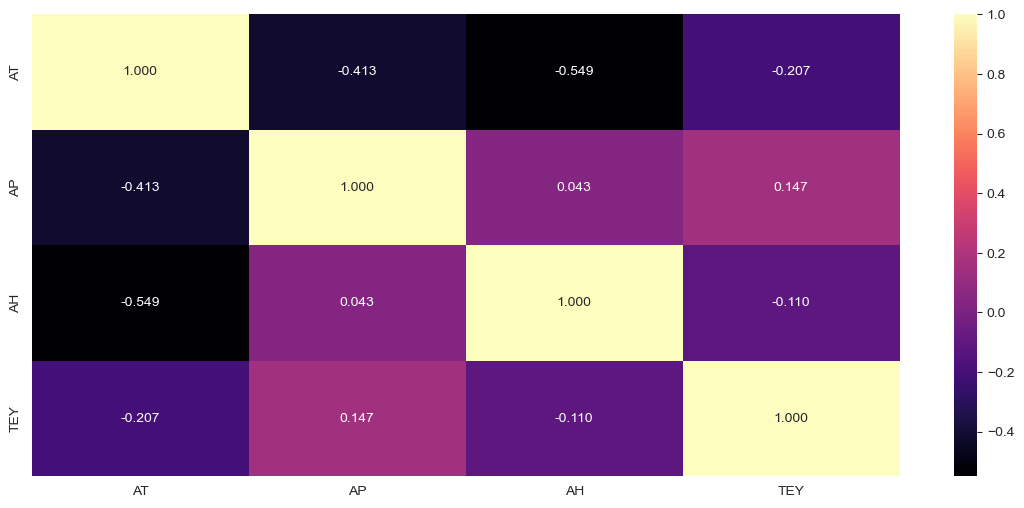

In [12]:
# Heatmap
plt.figure(figsize = (14, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

# Feature Analysis
All features in the dataset can be used in model building. This is a Regression Problem

In [13]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [14]:
# Splitting the data into train and test
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [15]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [17]:
len(xtrain_scale)

10527

In [18]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [19]:
scores = fit.scores_
features = fit.transform(X)

In [20]:
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score Feature
0  0.412325      AT
1  0.137584      AP
2  0.097594      AH

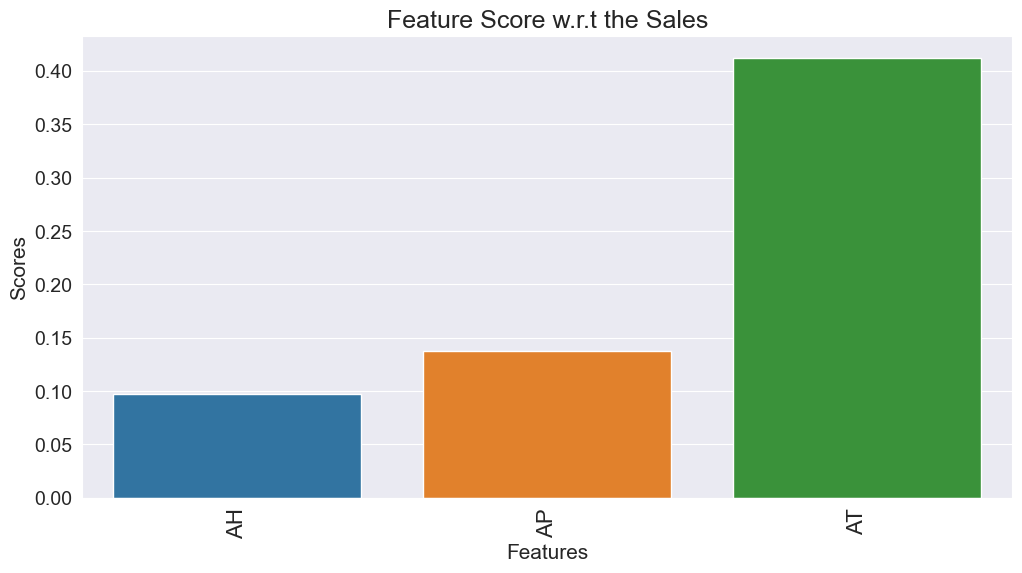

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [22]:
score_df.sort_values('Score', ascending=False)

Score Feature
0  0.412325      AT
1  0.137584      AP
2  0.097594      AH

# Neural network modelling

In [23]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

# Fit the model
hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)



Epoch 1/100


48/48 [==============================] - 2s 9ms/step - loss: 0.0736 - mse: 0.0736 - mae: 0.2088 - val_loss: 0.0453 - val_mse: 0.0453 - val_mae: 0.1529
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0454 - mse: 0.0454 - mae: 0.1547 - val_loss: 0.0450 - val_mse: 0.0450 - val_mae: 0.1522
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0450 - mse: 0.0450 - mae: 0.1537 - val_loss: 0.0447 - val_mse: 0.0447 - val_mae: 0.1547
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1545 - val_loss: 0.0443 - val_mse: 0.0443 - val_mae: 0.1550
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0442 - mse: 0.0442 - mae: 0.1544 - val_loss: 0.0436 - val_mse: 0.0436 - val_mae: 0.1537
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0439 - mse: 0.0439 - mae: 0.1580 - val_loss: 0.0429 - val_mse: 0.0429 - val_mae: 0.1547
Epoch 7/100
48/48 

Epoch 46/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1598 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1568
Epoch 47/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1593 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1571
Epoch 48/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1595 - val_loss: 0.0394 - val_mse: 0.0394 - val_mae: 0.1573
Epoch 49/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1599 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1570
Epoch 50/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1588 - val_loss: 0.0396 - val_mse: 0.0396 - val_mae: 0.1577
Epoch 51/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1594 - val_loss: 0.0400 - val_mse: 0.0400 - val_mae: 0.1601
Epoch 52/100
48/

Epoch 96/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1607 - val_loss: 0.0398 - val_mse: 0.0398 - val_mae: 0.1574
Epoch 97/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1587 - val_loss: 0.0391 - val_mse: 0.0391 - val_mae: 0.1560
Epoch 98/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0397 - mse: 0.0397 - mae: 0.1585 - val_loss: 0.0394 - val_mse: 0.0394 - val_mae: 0.1583
Epoch 99/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1596 - val_loss: 0.0391 - val_mse: 0.0391 - val_mae: 0.1572
Epoch 100/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0397 - mse: 0.0397 - mae: 0.1585 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1563


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Define the first model architecture
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the first model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the first model to the training data
model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
658/658 [==============================] - 2s 3ms/step - loss: 1372.8489 - mae: 19.4646 - val_loss: 254.5159 - val_mae: 11.4278
Epoch 2/50
658/658 [==============================] - 2s 2ms/step - loss: 260.6108 - mae: 11.8674 - val_loss: 246.9062 - val_mae: 11.3069
Epoch 3/50
658/658 [==============================] - 1s 2ms/step - loss: 252.2912 - mae: 11.8315 - val_loss: 243.5032 - val_mae: 11.8019
Epoch 4/50
658/658 [==============================] - 1s 2ms/step - loss: 246.7671 - mae: 11.9334 - val_loss: 235.9131 - val_mae: 11.7874
Epoch 5/50
658/658 [==============================] - 2s 3ms/step - loss: 240.1467 - mae: 11.9650 - val_loss: 230.6077 - val_mae: 11.8399
Epoch 6/50
658/658 [==============================] - 2s 3ms/step - loss: 235.6939 - mae: 11.9574 - val_loss: 220.9908 - val_mae: 11.4910
Epoch 7/50
658/658 [==============================] - 2s 3ms/step - loss: 232.5996 - mae: 11.9938 - val_loss: 224.0877 - val_mae: 11.7054
Epoch 8/50
658/658 [=============

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define the second model architecture
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the second model
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

# Fit the second model to the training data
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
329/329 [==============================] - 2s 4ms/step - loss: 13.1047 - mse: 340.7767 - val_loss: 12.3110 - val_mse: 253.2430
Epoch 2/100
329/329 [==============================] - 1s 3ms/step - loss: 11.6919 - mse: 248.8349 - val_loss: 11.1815 - val_mse: 237.1942
Epoch 3/100
329/329 [==============================] - 1s 3ms/step - loss: 11.7591 - mse: 247.4623 - val_loss: 11.2214 - val_mse: 235.8756
Epoch 4/100
329/329 [==============================] - 1s 3ms/step - loss: 11.9304 - mse: 251.4974 - val_loss: 12.0129 - val_mse: 245.0082
Epoch 5/100
329/329 [==============================] - 1s 3ms/step - loss: 11.5813 - mse: 242.5283 - val_loss: 11.1423 - val_mse: 234.1083
Epoch 6/100
329/329 [==============================] - 1s 3ms/step - loss: 11.7251 - mse: 244.6390 - val_loss: 11.3544 - val_mse: 235.9982
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 11.5555 - mse: 242.0168 - val_loss: 11.8580 - val_mse: 241.2867
Epoch 8/100
329/329 [======

329/329 [==============================] - 1s 3ms/step - loss: 11.3782 - mse: 244.3930 - val_loss: 11.1667 - val_mse: 238.1021
Epoch 60/100
329/329 [==============================] - 1s 3ms/step - loss: 11.3382 - mse: 243.9142 - val_loss: 11.0867 - val_mse: 237.8837
Epoch 61/100
329/329 [==============================] - 1s 3ms/step - loss: 11.3493 - mse: 243.7231 - val_loss: 11.3141 - val_mse: 239.7004
Epoch 62/100
329/329 [==============================] - 1s 2ms/step - loss: 11.3618 - mse: 244.3228 - val_loss: 11.3059 - val_mse: 239.6754
Epoch 63/100
329/329 [==============================] - 1s 3ms/step - loss: 11.3465 - mse: 244.2292 - val_loss: 11.2292 - val_mse: 239.0639
Epoch 64/100
329/329 [==============================] - 1s 3ms/step - loss: 11.3284 - mse: 244.1908 - val_loss: 11.1258 - val_mse: 238.4606
Epoch 65/100
329/329 [==============================] - 1s 2ms/step - loss: 11.3399 - mse: 244.6913 - val_loss: 11.1868 - val_mse: 239.0234
Epoch 66/100
329/329 [===========

In [ ]:
model2.summary()

# Model Evaluation

In [ ]:
y_predict = model.predict(xtest_scale)

In [ ]:
y_pred1 = model1.predict(xtest_scale)

In [ ]:
y_pred2 = model2.predict(xtest_scale)

In [ ]:
print(hist.history.keys())

In [ ]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

# Visualising

In [ ]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss

plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()